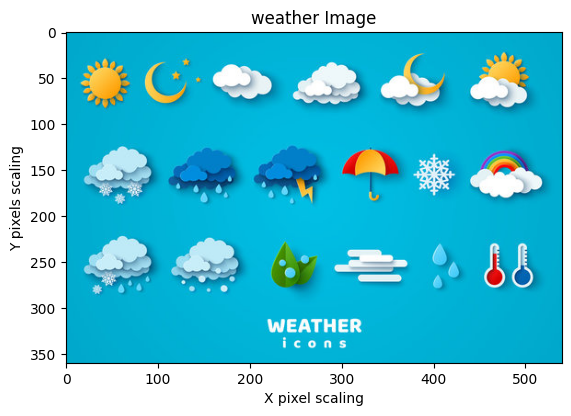

printing the API_KEY 57b25e62a9c07506183753610108250f
{'coord': {'lon': -74.006, 'lat': 40.7143}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 298.86, 'feels_like': 298.5, 'temp_min': 297.01, 'temp_max': 300.44, 'pressure': 1004, 'humidity': 39}, 'visibility': 9656, 'wind': {'speed': 5.81, 'deg': 265, 'gust': 11.62}, 'clouds': {'all': 0}, 'dt': 1686692366, 'sys': {'type': 1, 'id': 4610, 'country': 'US', 'sunrise': 1686648262, 'sunset': 1686702472}, 'timezone': -14400, 'id': 5128581, 'name': 'New York', 'cod': 200}
You asked for the weather in new york located in the country, US.
The temparaure in new york: 25.71c or 78.28F
The feels like temparaure in new york: 25.35c or 77.63F
The minimum temparaure in new york: 23.86c or 74.95F
The maximum temparaure in new york: 27.29c or 81.12F
Humidity in new york: 39.00%
wind speed in new york: 5.81mph
weather description in new york: haze
The sunrise in new york at 2023-06-1

In [51]:
#importing necessary packages
import requests
import json
import pandas as pd
import os
from dotenv import load_dotenv
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import datetime as dt


#importing the weather image , setting X and Y value for size of the image 
plt.title("weather Image")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")
 
#reading and displaying the weather image 
image = mpimg.imread("weather.jpg")
plt.imshow(image)
plt.show()

#loading the API key environment
load_dotenv()
#getting API key
api_key = os.getenv('API_KEY')
print("printing the API_KEY",api_key)
#taking input for city
city = input("Enter a city you want to get weather information for: ")

 
try:
      #defining a function to convert standard temp to celsius and fahrenheit
      def celsius_to_fahrenheit(temp_standard):
         celsius = temp_standard - 273.15
         fahrenheit = celsius*(9/5) + 32
         return celsius,fahrenheit
      
      # HTTP GET request based on entered city
      url= 'http://api.openweathermap.org/data/2.5/weather?q='+city+'&appid=' + api_key

      #coverting json data
      response = requests.get(url).json()  
      print(response)
      #extracting country value from dictionary and storing into a variable
      country_name = response['sys'] ['country']
      #extracting temp value from dictionary and storing into a variable
      temp_standard = response['main'] ['temp']
      #calling a function ...this function will calculate celsius and fahrenheit then retun value ,storing in two variables
      temp_celsius,temp_fahrenheit = celsius_to_fahrenheit(temp_standard)
      #extracting feelslike from dictionary 
      feels_like_st = response['main'] ['feels_like']
      #converting feels like to C and F by calling function
      feels_like_celsius, feels_like_fahrenheit = celsius_to_fahrenheit(feels_like_st)
      #extracting mintemp, maxtemp and converting to C and F
      min_temp = response['main'] ['temp_min']
      min_temp_celsius, min_temp_fahrenheit = celsius_to_fahrenheit(min_temp)
      max_temp = response['main'] ['temp_max']
      max_temp_celsius, max_temp_fahrenheit = celsius_to_fahrenheit(max_temp)
      #extracting wind, humidity and description from dictionary
      wind_speed = response['wind'] ['speed']  
      humidity = response['main'] ['humidity']
      description = response['weather'] [0] ['description']
      #converting sunrise and sunset to utctime zones
      sunrise_time = dt.datetime.utcfromtimestamp(response['sys']['sunrise'] + response['timezone'])
      sunset_time = dt.datetime.utcfromtimestamp(response['sys']['sunset'] + response['timezone'])   
      #printing all extracted values
      print(f"You asked for the weather in {city} located in the country, {country_name}.")
      print(f"The temparaure in {city}: {temp_celsius:.2f}c or {temp_fahrenheit:.2f}F")
      print(f"The feels like temparaure in {city}: {feels_like_celsius:.2f}c or {feels_like_fahrenheit:.2f}F")
      print(f"The minimum temparaure in {city}: {min_temp_celsius:.2f}c or {min_temp_fahrenheit:.2f}F")
      print(f"The maximum temparaure in {city}: {max_temp_celsius:.2f}c or {max_temp_fahrenheit:.2f}F")
      print(f"Humidity in {city}: {humidity:.2f}%")
      print(f"wind speed in {city}: {wind_speed}mph")
      print(f"weather description in {city}: {description}")
      print(f"The sunrise in {city} at {sunrise_time} localtime.")
      print(f"The sunset in {city} at {sunset_time} local time.")
except requests.exceptions.RequestException as e:
      print("Connection error occured ", e)
except KeyError:
      print(f"Enter city not found :{city}")
finally:
      print("\n Request completed")   


     
        
